<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/%D0%94%D0%97_17_05_2025_(4_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from typing import Callable
%matplotlib inline

## 4.4

Решить краевую задачу для обыкновенного дифференциального уравнения второго порядка на указанном отрезке методомстрельбы и конечно-разностным методом.

Краевая задача:

$xy'' - (2x+1)y' + (x+1)y=0$

$y'(1) = 3e$

$y'(2) - 2y(2) = 0$

Точное решение:

$y(x) = e^x x^2$


In [ ]:
def tma(a, b, c, d, shape):
    p = [-c[0] / b[0]]
    q = [d[0] / b[0]]
    x = [0] * (shape + 1)
    for i in range(1, shape):
        p.append(-c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))
    for i in reversed(range(shape)):
        x[i] = p[i] * x[i + 1] + q[i]
    return x[:-1]


def der_one(xi, yi, x):
    i = 0
    while xi[i + 1] < x - 1e-7:
        i += 1
    return (yi[i + 1] - yi[i]) / (xi[i + 1] - xi[i])


def next_n(cur_n, prev_n, ans_cur, ans_prev, alpha1, beta1, B, b):
    num1 = beta1 * der_one(ans_cur[0], ans_cur[1], b)
    num2 = beta1 * der_one(ans_prev[0], ans_prev[1], b)
    num3 = alpha1 * ans_prev[1][len(ans_prev[0]) - 1]
    num4 = alpha1 * ans_cur[1][len(ans_cur[0]) - 1] + num1 - B
    num5 = alpha1 * ans_cur[1][len(ans_cur[0]) - 1] + num1 - num3 - num2
    return cur_n - num4 * (cur_n - prev_n) / num5


def shooting_method(a, b, h, eps, f, alpha0, alpha1, beta0, beta1, A, B):
    n_prev = 1
    n_cur = 0.8
    ans_prev = Runge_Kutta(f, a, b, n_prev, (A - alpha0 * n_prev) / beta0, h)[0]
    ans_cur = Runge_Kutta(f, a, b, n_cur, (A - alpha0 * n_cur) / beta0, h)[0]
    while abs(alpha1 * ans_cur[1][len(ans_cur[0]) - 1] + \
          beta1 * der_one(ans_cur[0], ans_cur[1], b) - B) > eps:
        n = next_n(n_cur, n_prev, ans_cur, ans_prev, alpha1, beta1, B, b)
        n_prev = n_cur
        n_cur = n
        ans_prev = ans_cur
        ans_cur = Runge_Kutta(f, a, b, n_cur, (A - alpha0*n_cur) / beta0, h)[0]
    return ans_cur


def finite_difference_method(a1, b1, h, alpha_0, alpha_1, beta_0, beta_1, A, B):
    x = [a1]
    a = []
    b = []
    c = []
    d = []
    n = round((b1 - a1) / h)
    a.append(0)
    b.append(-2 / (h * (2 - p(a1) * h)) + q(a1) * h /
             (2 - p(a1) * h) + alpha_0 / beta_0)
    c.append(2 / (h * (2 - p(a1) * h)))
    d.append(A / beta_0 + h * f(a1) / (2 - p(a1) * h))
    x.append(x[0] + h)
    for i in range(1, n):
        a.append(1 / h**2 - p(x[i]) / (2 * h))
        b.append(-2 / h**2 + q(x[i]))
        c.append(1 / h**2 + p(x[i]) / (2 * h))
        d.append(f(x[i]))
        x.append(x[i] + h)
    a.append(-2 / (h * (2 + p(x[n]) *  h)))
    b.append(2 / (h * (2 + p(x[n]) * h)) - q(x[n]) * h /
             (2 + p(x[n]) * h) + alpha_1 / beta_1)
    c.append(0)
    d.append(B / beta_1 - h * f(x[n]) / (2 + p(x[n]) * h))
    y = tma(a, b, c, d, len(a))
    return x, y


if __name__ == "__main__":

    func = lambda x, y, y_der: ((2 * x + 1) * y_der - (x + 1) * y) / x
    true_f = lambda x: np.exp(x) * x**2

    # p, q, x are needed for the finite differences method and can
    # be optained from the original equation: y'' + p(x)y' + q(x)y = f(x)
    p = lambda x: -(2 * x + 1) / x
    q = lambda x: (x + 1) / x
    f = lambda x: 0

    a = 1
    b = 2
    alpha0 = 0
    alpha1 = -2
    beta0 = 1
    beta1 = 1
    y0 = 3 * math.e
    y10 = 0
    step = 0.1
    eps = 0.01

    res1 = shooting_method(a, b, step, eps, func, alpha0, alpha1, beta0, beta1, y0, y10)
    res2 = shooting_method(a, b, step / 2, eps, func, alpha0, alpha1, beta0, beta1, y0, y10)
    res1 = finite_difference_method(a, b, step, alpha0, alpha1, beta0, beta1, y0, y10)
    res2 = finite_difference_method(a, b, step / 2, alpha0, alpha1, beta0, beta1, y0, y10)

    results = {
        'Method name' : [],
        'x' : [],
        'y' : [],
        'f(x)' : [],
        '|y - f(x)|' : [],
        'Runge-Romberg error': []
    }

    for i in range(len(res1[0])):
        results['Method name'].append('Shooting method')
        results['x'].append(res1[0][i])
        results['y'].append(res1[1][i])
        results['f(x)'].append(true_f(res1[0][i]))
        results['|y - f(x)|'].append(abs(res1[1][i] - true_f(res1[0][i])))
        results['Runge-Romberg error'].append((res1_half_h[1][i] - res1[1][i]) / (2**2 - 1))

    for i in range(len(res2[0])):
        results['Method name'].append('Finite difference method')
        results['x'].append(res2[0][i])
        results['y'].append(res2[1][i])
        results['f(x)'].append(true_f(res2[0][i]))
        results['|y - f(x)|'].append(abs(res2[1][i] - true_f(res2[0][i])))
        results['Runge-Romberg error'].append((res2_half_h[1][i] - res2[1][i]) / (2**4 - 1))

In [ ]:
pd.DataFrame(results)

,Method name,x,y,f(x),|y - f(x)|,Runge-Romberg error
0,Shooting method,1.00,2.841141,2.718282,0.122859,0.865141
1,Shooting method,1.10,3.750537,3.635041,0.115496,0.663944
2,Shooting method,1.20,4.885726,4.780968,0.104757,0.398887
3,Shooting method,1.30,6.291282,6.201111,0.090170,0.055239
4,Shooting method,1.40,8.019428,7.948192,0.071236,-0.384241
5,Shooting method,1.50,10.131234,10.083800,0.047434,-0.939707
6,Shooting method,1.60,12.697995,12.679763,0.018232,-1.634694
7,Shooting method,1.70,15.802809,15.819708,0.016899,-2.496647
8,Shooting method,1.80,19.542380,19.600858,0.058478,-3.557527
9,Shooting method,1.90,24.029095,24.136079,0.106984,-4.854503


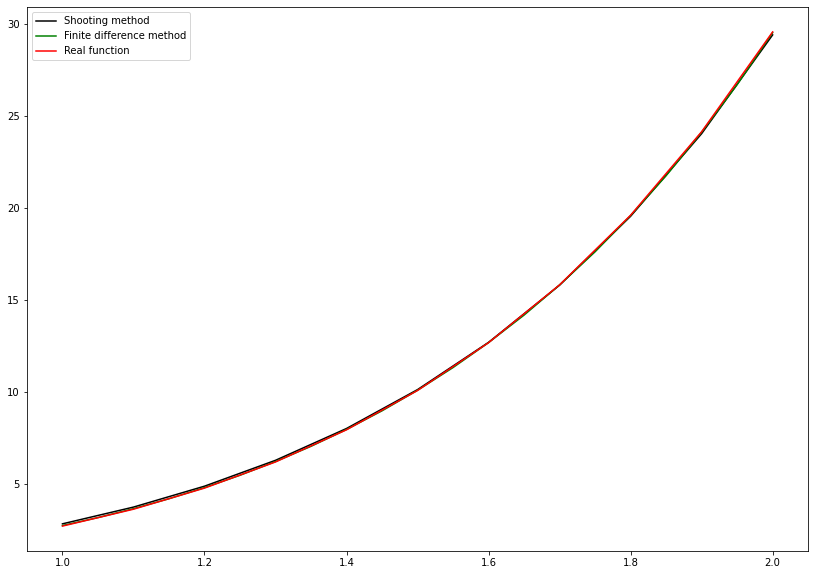

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(*res1, color='black', label='Shooting method')
plt.plot(*res2, color='green', label='Finite difference method')
plt.plot(np.arange(a, b+step, step), list(map(true_f, np.arange(a, b+step, step))), color='red', label='Real function')
plt.legend()
plt.show()